<a href="https://colab.research.google.com/github/tomeliud/Football-Game-Results-Prediction-/blob/master/Football_Match_Result_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Football Game Prediction Results

## 1. Defining the Question

### a) Specifying the Question




1. Predict the Home Team Score and the Away Team Score given the Rank of Home Team and the Away Team and the Type of Tournament

2. From the Home Team’s perspective predict if the game is a Win, Lose or Draw





### b) Defining the Metric for Success

> The Metric of Success is to Identify the Independent Variables for our Models

## 2. Reading the Data

In [ ]:
# Loading the Dataset
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
rank = pd.read_csv('fifa_ranking.csv')

results = pd.read_csv('results.csv')

## 3. Checking the Data

Checking Data in the Results Dataset

In [ ]:
rank.head()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08


In [ ]:
rank.shape

(57793, 16)

In [ ]:
rank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57793 entries, 0 to 57792
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   rank                     57793 non-null  int64  
 1   country_full             57793 non-null  object 
 2   country_abrv             57793 non-null  object 
 3   total_points             57793 non-null  float64
 4   previous_points          57793 non-null  int64  
 5   rank_change              57793 non-null  int64  
 6   cur_year_avg             57793 non-null  float64
 7   cur_year_avg_weighted    57793 non-null  float64
 8   last_year_avg            57793 non-null  float64
 9   last_year_avg_weighted   57793 non-null  float64
 10  two_year_ago_avg         57793 non-null  float64
 11  two_year_ago_weighted    57793 non-null  float64
 12  three_year_ago_avg       57793 non-null  float64
 13  three_year_ago_weighted  57793 non-null  float64
 14  confederation         

Checking Data in the Fifa Ranking Dataset

In [ ]:
results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [ ]:
results.shape

(40839, 9)

In [ ]:
results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40839 entries, 0 to 40838
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        40839 non-null  object
 1   home_team   40839 non-null  object
 2   away_team   40839 non-null  object
 3   home_score  40839 non-null  int64 
 4   away_score  40839 non-null  int64 
 5   tournament  40839 non-null  object
 6   city        40839 non-null  object
 7   country     40839 non-null  object
 8   neutral     40839 non-null  bool  
dtypes: bool(1), int64(2), object(6)
memory usage: 2.5+ MB


In [ ]:
football = rank.merge(results, left_on=['rank_date','country_full'], right_on=['date','country'], how= 'inner')
football.head()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,8,Brazil,BRA,0.0,55,-5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08,1993-08-08,Brazil,Mexico,1,1,Friendly,Maceió,Brazil,False
1,35,Ecuador,ECU,0.0,23,30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08,1993-08-08,Ecuador,Venezuela,5,0,FIFA World Cup qualification,Quito,Ecuador,False
2,50,Zimbabwe,ZIM,0.0,27,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,1993-08-08,1993-08-08,Zimbabwe,Eswatini,2,0,Friendly,Harare,Zimbabwe,False
3,59,Bolivia,BOL,0.0,13,28,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,La Paz,Bolivia,False
4,65,Guinea,GUI,0.0,23,-2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,1993-08-08,1993-08-08,Guinea,Sierra Leone,1,0,Friendly,Conakry,Guinea,False


In [ ]:
football.shape

(950, 25)

In [ ]:
football.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 950 entries, 0 to 949
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   rank                     950 non-null    int64  
 1   country_full             950 non-null    object 
 2   country_abrv             950 non-null    object 
 3   total_points             950 non-null    float64
 4   previous_points          950 non-null    int64  
 5   rank_change              950 non-null    int64  
 6   cur_year_avg             950 non-null    float64
 7   cur_year_avg_weighted    950 non-null    float64
 8   last_year_avg            950 non-null    float64
 9   last_year_avg_weighted   950 non-null    float64
 10  two_year_ago_avg         950 non-null    float64
 11  two_year_ago_weighted    950 non-null    float64
 12  three_year_ago_avg       950 non-null    float64
 13  three_year_ago_weighted  950 non-null    float64
 14  confederation            9

## 4. External Data Source Validation

Making sure your data matches something outside of the dataset is very important. It allows you to ensure that the measurements are roughly in line with what they should be and it serves as a check on what other things might be wrong in your dataset. External validation can often be as simple as checking your data against a single number, as we will do here.

### a.Validation

## 5. Tidying the Dataset

In [ ]:
# Identifying the Missing Data
#
football.isnull().sum()

rank                       0
country_full               0
country_abrv               0
total_points               0
previous_points            0
rank_change                0
cur_year_avg               0
cur_year_avg_weighted      0
last_year_avg              0
last_year_avg_weighted     0
two_year_ago_avg           0
two_year_ago_weighted      0
three_year_ago_avg         0
three_year_ago_weighted    0
confederation              0
rank_date                  0
date                       0
home_team                  0
away_team                  0
home_score                 0
away_score                 0
tournament                 0
city                       0
country                    0
neutral                    0
dtype: int64

> No Missing Data In our Merged Dataset

In [ ]:
# Drop Duplicates
football.duplicated().any()

False

In [ ]:
# Drop Irrelevant columns
football.drop(['country_abrv','total_points','cur_year_avg','cur_year_avg_weighted','last_year_avg','last_year_avg_weighted',
               'two_year_ago_avg','two_year_ago_weighted','three_year_ago_avg','three_year_ago_weighted','rank_date','country','confederation','city'], axis=1, inplace=True)

In [ ]:
football.head()

,rank,country_full,previous_points,rank_change,date,home_team,away_team,home_score,away_score,tournament,neutral
0,8,Brazil,55,-5,1993-08-08,Brazil,Mexico,1,1,Friendly,False
1,35,Ecuador,23,30,1993-08-08,Ecuador,Venezuela,5,0,FIFA World Cup qualification,False
2,50,Zimbabwe,27,4,1993-08-08,Zimbabwe,Eswatini,2,0,Friendly,False
3,59,Bolivia,13,28,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,False
4,65,Guinea,23,-2,1993-08-08,Guinea,Sierra Leone,1,0,Friendly,False


In [ ]:
football.tail()

,rank,country_full,previous_points,rank_change,date,home_team,away_team,home_score,away_score,tournament,neutral
945,12,England,1040,1,2018-06-07,Kárpátalja,Székely Land,4,2,CONIFA World Football Cup,True
946,14,Uruguay,976,3,2018-06-07,Uruguay,Uzbekistan,3,0,Friendly,False
947,22,Iceland,930,0,2018-06-07,Iceland,Ghana,2,2,Friendly,False
948,26,Austria,841,0,2018-06-07,South Korea,Bolivia,0,0,Friendly,True
949,97,India,354,0,2018-06-07,India,New Zealand,1,2,Intercontinental Cup,False


In [ ]:
football.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 950 entries, 0 to 949
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   rank             950 non-null    int64 
 1   country_full     950 non-null    object
 2   previous_points  950 non-null    int64 
 3   rank_change      950 non-null    int64 
 4   date             950 non-null    object
 5   home_team        950 non-null    object
 6   away_team        950 non-null    object
 7   home_score       950 non-null    int64 
 8   away_score       950 non-null    int64 
 9   tournament       950 non-null    object
 10  neutral          950 non-null    bool  
dtypes: bool(1), int64(5), object(5)
memory usage: 82.6+ KB


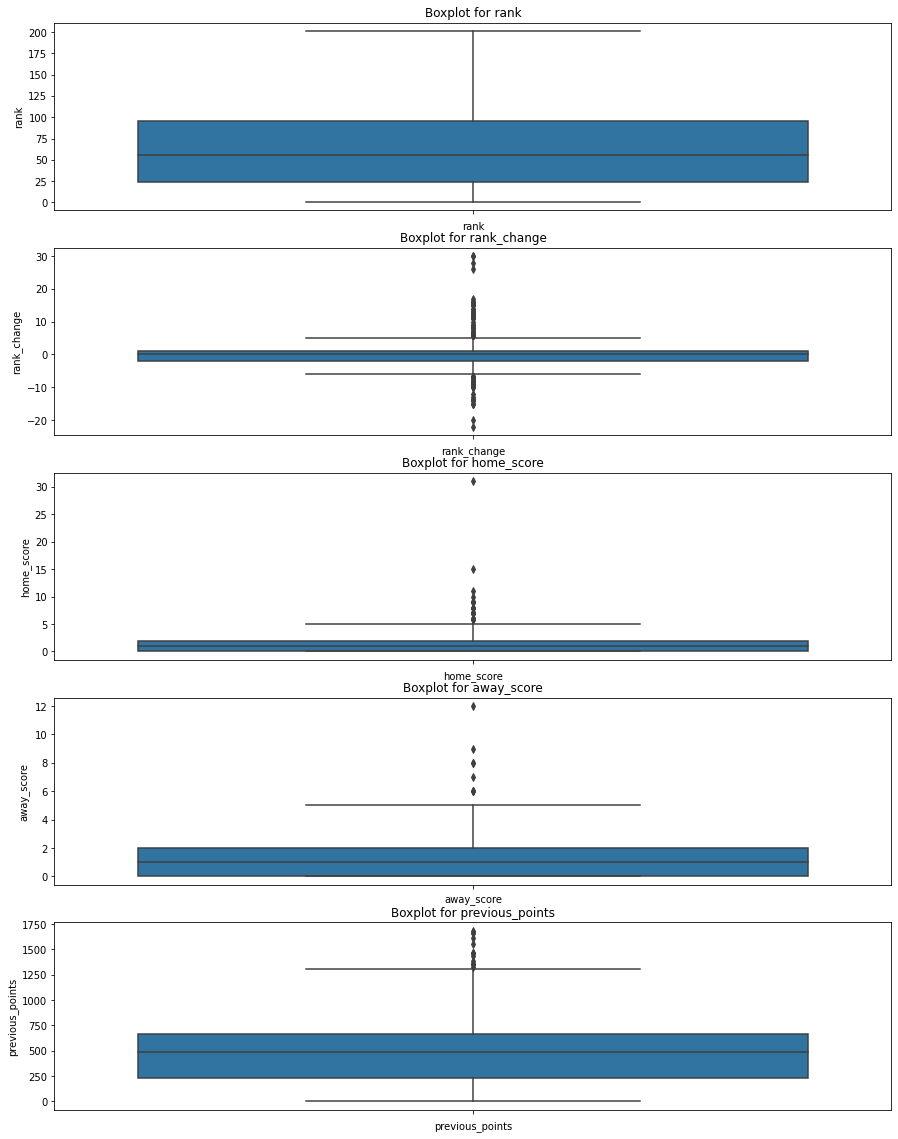

In [ ]:
# Checking for Outliers
#
col_names = ['rank','rank_change','home_score','away_score','previous_points']
fig,ax = plt.subplots(len(col_names),figsize=(15,20))

for i, col_val in enumerate(col_names):
  sns.boxplot(football[col_val], ax=ax[i], orient= 'v')
  #plt.subplots_adjust(top= 1.5,bottom=0.5,hspace=2)
  ax[i].set_title('Boxplot for {}'.format(col_val))
  ax[i].set_xlabel(col_val, fontsize=10)

In [ ]:
# Dropping Outliers

q3 = football.quantile(0.75)
q1 = football.quantile(0.25)

iqr = q3 -q1

football_o = football[~((football < (q1 - 1.5 * iqr)) | (football > (q3 + 1.5 * iqr))).any(axis=1)]


In [ ]:
print("The no. of records after removing outliers :",football_o.shape)
print("The no. of records before :",football.shape)

The no. of records after removing outliers : (703, 11)
The no. of records before : (950, 11)


In [ ]:
# Checking for Anomalies
#


In [ ]:
# Import the clean Dataset
football_o.to_csv("football_new.csv")

## 6. Exploratory Analysis

In [ ]:
# Load clean Dataset
data = pd.read_csv('football_new.csv')

data.drop('Unnamed: 0', 1, inplace=True)
data.head()

,rank,country_full,previous_points,rank_change,date,home_team,away_team,home_score,away_score,tournament,neutral
0,8,Brazil,55,-5,1993-08-08,Brazil,Mexico,1,1,Friendly,False
1,50,Zimbabwe,27,4,1993-08-08,Zimbabwe,Eswatini,2,0,Friendly,False
2,65,Guinea,23,-2,1993-08-08,Guinea,Sierra Leone,1,0,Friendly,False
3,67,Paraguay,22,1,1993-08-08,Paraguay,Argentina,1,3,FIFA World Cup qualification,False
4,44,Saudi Arabia,34,0,1993-09-23,Saudi Arabia,Costa Rica,1,2,Friendly,False


In [ ]:
categorical = ['country_full','date','home_team','away_team','tournament']

for i in categorical:
  print(football_o[i].value_counts())
  print('*****************************')

Estonia         14
Portugal        14
England         13
Greece          13
Saudi Arabia    12
                ..
Chad             1
Liberia          1
Seychelles       1
Guyana           1
Canada           1
Name: country_full, Length: 146, dtype: int64
*****************************
2010-08-11    46
2010-03-03    38
2007-08-22    36
2005-08-17    36
2006-08-16    30
              ..
2017-05-04     1
1996-01-24     1
2000-12-20     1
1998-07-15     1
2011-12-21     1
Name: date, Length: 132, dtype: int64
*****************************
Portugal        14
Estonia         14
Greece          13
Saudi Arabia    12
Hungary         12
                ..
Mauritania       1
Bermuda          1
Indonesia        1
Chad             1
Barbados         1
Name: home_team, Length: 147, dtype: int64
*****************************
Argentina          13
Spain              12
Bulgaria           11
Uruguay            11
United States      11
                   ..
Macau               1
Senegal             1
Gu

Text(0.5, 1.0, 'Home Team Countries')

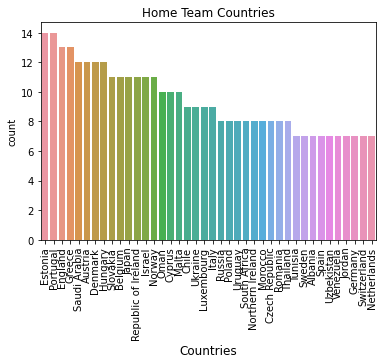

In [ ]:
# Plotting Bar Plots

# Top 40 countries we have which are similar to the List of Home Teams
sns.countplot(data['country_full'], order= data['country_full'].value_counts().iloc[:40].index)
plt.xticks(rotation = 90)
plt.xlabel('Countries', fontsize=12)
plt.title('Home Team Countries')

Text(0.5, 1.0, 'Away Team  Countries')

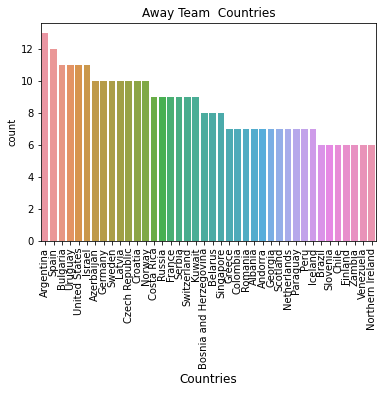

In [ ]:
# 40 of the Away team countries
sns.countplot(data['away_team'], order= data['away_team'].value_counts().iloc[:40].index)
plt.xticks(rotation = 90)
plt.xlabel('Countries', fontsize=12)
plt.title('Away Team  Countries')

Text(0.5, 1.0, 'Types of Tournments')

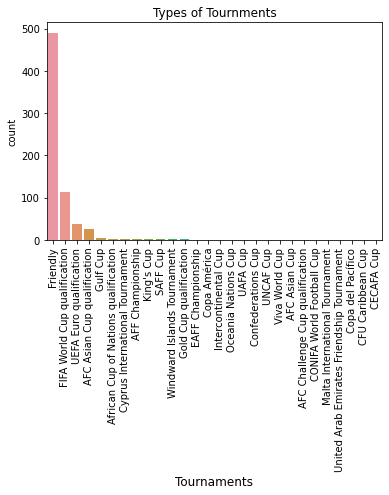

In [ ]:
sns.countplot(data['tournament'], order= data['tournament'].value_counts().index)
plt.xticks(rotation = 90)
plt.xlabel('Tournaments', fontsize=12)
plt.title('Types of Tournments')

From Our Plots we see that England has the highest count in being the Home Team

Argentina is the country with highest count in being the Away Team

The top 3 tournaments are
*   Friendly
*   Fifa World Cup
*   UEFA









Numerical Variables

In [ ]:
#Description
numerical = data[['rank','rank_change','home_score','away_score','previous_points']]

des = numerical.describe()
des.loc['Range'] = des.loc['max'] - des.loc['min']
des.loc['IQR'] = des.loc['75%'] - des.loc['25%'] 
# appending interquartile range instead of recalculating it
des = des.append(numerical.reindex(des.columns, axis=1).agg(['skew', 'kurt']))
des

,rank,rank_change,home_score,away_score,previous_points
count,703.000000,703.000000,703.000000,703.000000,703.000000
mean,63.507824,-0.385491,1.431010,0.977240,466.270270
std,47.279910,2.206741,1.234825,1.067278,289.013862
min,1.000000,-6.000000,0.000000,0.000000,0.000000
25%,24.500000,-2.000000,0.000000,0.000000,248.000000
50%,53.000000,0.000000,1.000000,1.000000,501.000000
75%,93.000000,1.000000,2.000000,2.000000,658.500000
max,201.000000,5.000000,5.000000,5.000000,1306.000000
Range,200.000000,11.000000,5.000000,5.000000,1306.000000
IQR,68.500000,3.000000,2.000000,2.000000,410.500000


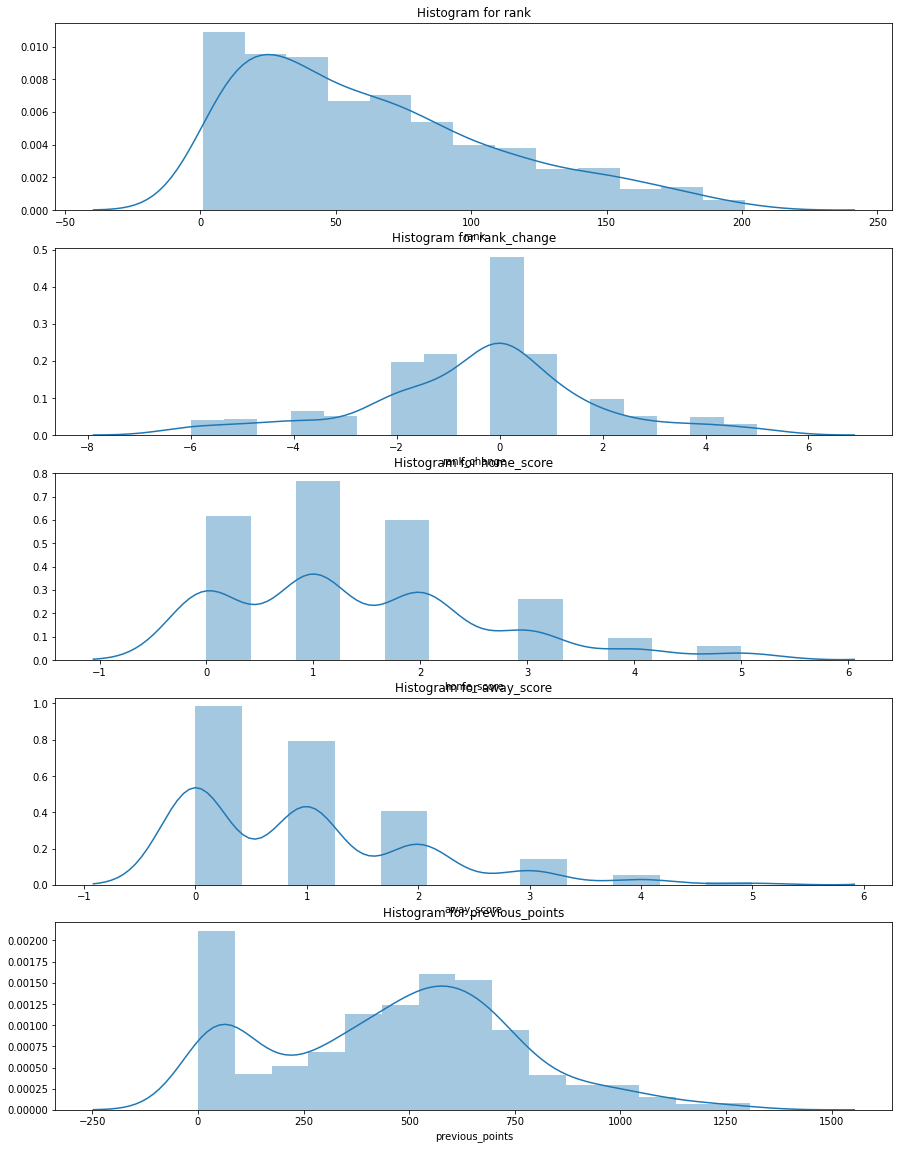

In [ ]:
col_name = ['rank','rank_change','home_score','away_score','previous_points']

fig,ax = plt.subplots(len(col_name),figsize=(15,20))

for i, col_val in enumerate(col_name):
  sns.distplot(data[col_val], ax=ax[i])
  #plt.subplots_adjust(top= 1.5,bottom=0.5,hspace=2)
  ax[i].set_title('Histogram for {}'.format(col_val))
  ax[i].set_xlabel(col_val, fontsize=10)

Bivariate Analysis

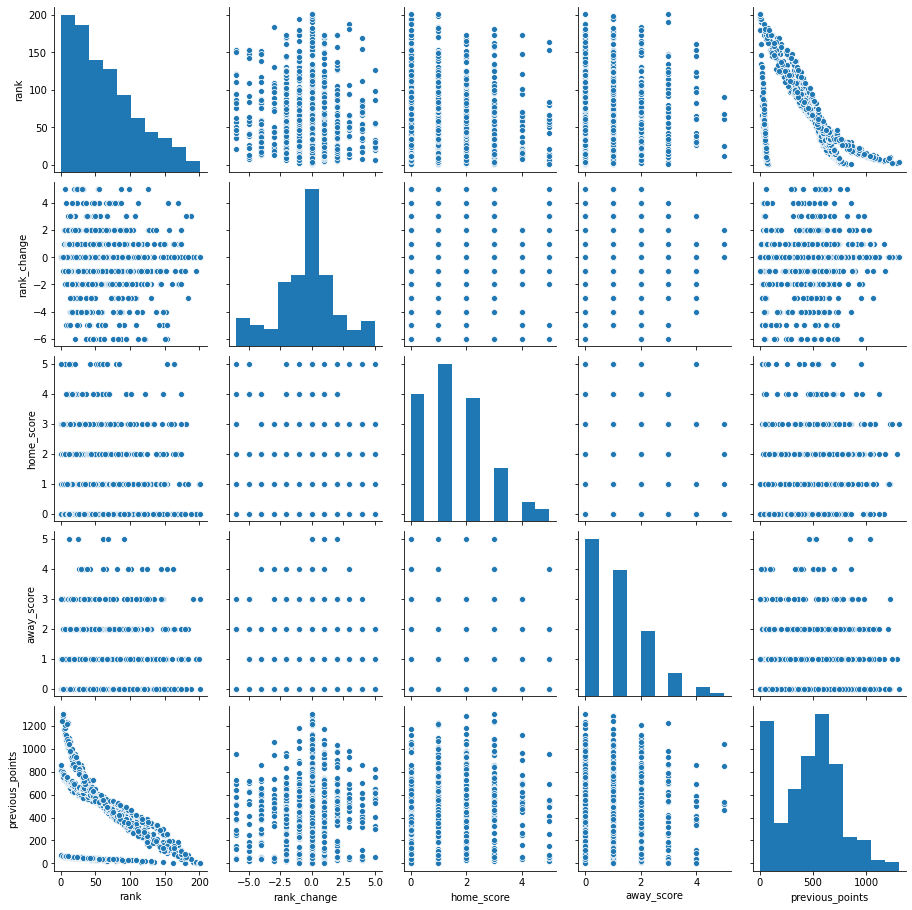

In [ ]:
sns.pairplot(numerical)

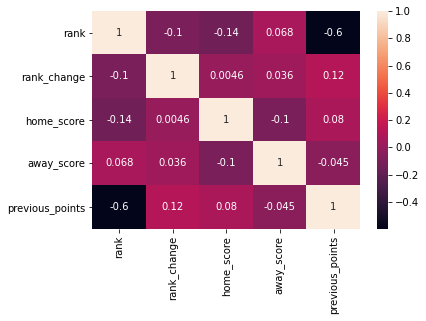

In [ ]:
# A heatmap to show correlation

sns.heatmap(numerical.corr(), annot=True)

Multicollinearity wasn't checked using the VIF method because the Independent Variables very low correlation 

**Feature Engineering**

In [ ]:
tournament = pd.get_dummies(data['tournament'], drop_first=True)
tournament.head()

,AFC Asian Cup qualification,AFC Challenge Cup qualification,AFF Championship,African Cup of Nations qualification,CECAFA Cup,CFU Caribbean Cup,CONIFA World Football Cup,Confederations Cup,Copa América,Copa del Pacífico,Cyprus International Tournament,EAFF Championship,FIFA World Cup qualification,Friendly,Gold Cup qualification,Gulf Cup,Intercontinental Cup,King's Cup,Malta International Tournament,Oceania Nations Cup,SAFF Cup,UAFA Cup,UEFA Euro qualification,UNCAF Cup,United Arab Emirates Friendship Tournament,Viva World Cup,Windward Islands Tournament
0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
data1 = data.drop(['tournament','country_full','previous_points','rank_change','date','home_team','away_team','neutral'],1)

independent_var = pd.concat([data1,tournament], axis=1)
independent_var.head()

,rank,home_score,away_score,AFC Asian Cup qualification,AFC Challenge Cup qualification,AFF Championship,African Cup of Nations qualification,CECAFA Cup,CFU Caribbean Cup,CONIFA World Football Cup,Confederations Cup,Copa América,Copa del Pacífico,Cyprus International Tournament,EAFF Championship,FIFA World Cup qualification,Friendly,Gold Cup qualification,Gulf Cup,Intercontinental Cup,King's Cup,Malta International Tournament,Oceania Nations Cup,SAFF Cup,UAFA Cup,UEFA Euro qualification,UNCAF Cup,United Arab Emirates Friendship Tournament,Viva World Cup,Windward Islands Tournament
0,8,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,50,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,65,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,67,1,3,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,44,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


## 7. Implementing the Solution

### PolyNomial Approach

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

#### Model 1 
##### **Predicting Home Scores**

In [ ]:
# Split the data into features and labels
X = independent_var['rank'].values.reshape(-1,1)
y = independent_var['home_score'].values


Text(0, 0.5, 'Home Score')

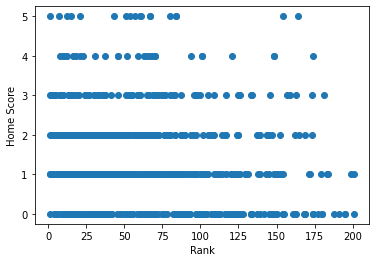

In [ ]:
plt.scatter(X,y)
plt.xlabel('Rank')
plt.ylabel('Home Score')

In [ ]:
# Fit the Independet Variables to a Polynomial 
from sklearn.preprocessing import PolynomialFeatures

poly_reg = PolynomialFeatures(degree = 1)
Xpoly = poly_reg.fit_transform(X)

# Split into Training and Test
X_train,X_test,y_train,y_test = train_test_split(Xpoly,y,test_size = 0.2)

LinReg = LinearRegression()
LinReg.fit( X_train, y_train)

# Make Predictions
y_pred = LinReg.predict(X_test)

# Residuals
residuals = np.subtract(y_pred,y_test)
# Calculate RMSE
from sklearn import metrics
RMSE = np.sqrt(metrics.mean_squared_error(y_test,y_pred))
RMSE

1.2222261148480729

**Cross Validation**

In [ ]:
from sklearn.model_selection import KFold

X = independent_var['rank'].values.reshape(-1,1)
y = independent_var['home_score'].values

folds = KFold(n_splits = 10)

print("We are using",str(folds.get_n_splits(X)),'folds')

RMSE = []
count = 1
for train_index,test_index in folds.split(X):
  print("Training Model", str(count))

  poly_reg = PolynomialFeatures(degree = 1)
  X_poly = poly_reg.fit_transform(X)

  X_train,X_test = X_poly[train_index],X_poly[test_index]
  y_train,y_test = y[train_index],y[test_index]

  LinReg = LinearRegression()
  LinReg.fit( X_train, y_train)

  # Make Predictions
  y_pred = LinReg.predict(X_test)

  # Calculate RMSE
  rmse = np.sqrt(metrics.mean_squared_error(y_test,y_pred))
  RMSE.append(rmse)

  print("Model",str(count),"has a RMSE of ", rmse)
  count = count + 1

We are using 10 folds
Training Model 1
Model 1 has a RMSE of  1.2563620448876585
Training Model 2
Model 2 has a RMSE of  1.3666036251486688
Training Model 3
Model 3 has a RMSE of  1.2114461826832166
Training Model 4
Model 4 has a RMSE of  1.1162354340957807
Training Model 5
Model 5 has a RMSE of  1.4169650878333044
Training Model 6
Model 6 has a RMSE of  0.9972224879186633
Training Model 7
Model 7 has a RMSE of  1.1623106728435175
Training Model 8
Model 8 has a RMSE of  1.1969327213903471
Training Model 9
Model 9 has a RMSE of  1.0915962791432257
Training Model 10
Model 10 has a RMSE of  1.3744674919020146


In [ ]:
from sklearn.model_selection import LeaveOneOut

folds = LeaveOneOut()

print('we are using ' +str(folds.get_n_splits(X)) + ' folds')

RMSES = []
count = 0 
for train_index, test_index in folds.split(X):
  poly_reg = PolynomialFeatures(degree = 1)
  X_poly = poly_reg.fit_transform(X)

  X_train,X_test = X_poly[train_index],X_poly[test_index]
  y_train,y_test = y[train_index],y[test_index]

  LinReg = LinearRegression()
  LinReg.fit( X_train, y_train)

  # Make Predictions
  y_pred = LinReg.predict(X_test)

  # Calculate RMSE
  rmse = np.sqrt(metrics.mean_squared_error(y_test,y_pred))
  RMSE.append(rmse)

  count = count + 1
print("We have trained",str(count)," models with the mean of RMSE as ",np.mean(RMSE) )


we are using 703 folds
We have trained 703  models with the mean of RMSE as  0.9940351146902844


Model 6 has the lowest value for RMSE of 0.9972224879186633, therefore we will pick it for an optimal model

**Heteroscedasticity**

In [ ]:
# Testing Heteroscedacity using the Bartletts Test

import scipy as sp

test_result, p_value = sp.stats.bartlett(y_pred, residuals)

# To interpret the results we must also compute a critical value of the chi squared distribution
degree_of_freedom = len(y_pred)-1
probability = 1 - p_value

critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)
print(critical_value)

if (test_result > critical_value):
  print('the variances are unequal, and the model should be reassessed')
else:
  print('the variances are homogeneous!')


nan
the variances are homogeneous!


/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:3584: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.6/dist-packages/scipy/stats/morestats.py:2242: RuntimeWarning: divide by zero encountered in true_divide
  denom = 1.0 + 1.0/(3*(k - 1)) * ((np.sum(1.0/(Ni - 1.0), axis=0)) -


**Using MultiLinear Regression for Tournament Type**

In [ ]:
# Predicting Home Score using the tournament type
X = independent_var.iloc[:,3:].values
y = independent_var['home_score'].values


# Split the Data  to train and test
T_train,T_test,h_train,h_test = train_test_split(X,y, test_size=0.3)

# Train the Data
LinReg.fit(T_train,h_train)

# Make Predictions
h_pred = LinReg.predict(T_test)

#Residuals
res = np.subtract(h_pred, h_test)
# Evaluate the Model
RMSE = np.sqrt(metrics.mean_squared_error(h_test,h_pred))
RMSE

2346354634349.723

**Cross Validation**

In [ ]:
X = independent_var.iloc[:,3:].values
y = independent_var['home_score'].values

folds = KFold(n_splits = 15)

print("We are using",str(folds.get_n_splits(X)),'folds')

RMSE = []
count = 1
for train_index,test_index in folds.split(X):
  print("Training Model", str(count))

  T_train,T_test = X[train_index],X[test_index]
  h_train,h_test = y[train_index],y[test_index]

  # Train the Data
  LinReg.fit(T_train,h_train)

  # Make Predictions
  h_pred = LinReg.predict(T_test)


  # Calculate RMSE
  rmse = np.sqrt(metrics.mean_squared_error(h_test,h_pred))
  RMSE.append(rmse)

  print("Model",str(count),"has a RMSE of ", rmse)
  count = count + 1

print("******************************")
print("The mean RMSE score is",np.mean(RMSE))

We are using 15 folds
Training Model 1
Model 1 has a RMSE of  1.2732595352035572
Training Model 2
Model 2 has a RMSE of  1.4677573635034167
Training Model 3
Model 3 has a RMSE of  1.285787554650167
Training Model 4
Model 4 has a RMSE of  1.2210446559045467
Training Model 5
Model 5 has a RMSE of  1.3912967970864836
Training Model 6
Model 6 has a RMSE of  1.0227234794959854
Training Model 7
Model 7 has a RMSE of  1.2882213896281447
Training Model 8
Model 8 has a RMSE of  1.6078096559440718
Training Model 9
Model 9 has a RMSE of  1.0023465288709885
Training Model 10
Model 10 has a RMSE of  5124289637538.905
Training Model 11
Model 11 has a RMSE of  1.2133250550447388
Training Model 12
Model 12 has a RMSE of  1.3129486178623748
Training Model 13
Model 13 has a RMSE of  1.0788372836493423
Training Model 14
Model 14 has a RMSE of  1.1154458223893906
Training Model 15
Model 15 has a RMSE of  1.5590882206181924
******************************
The mean RMSE score is 341619309170.44965


In [ ]:
# Checking for the best RMSE score our model can give

folds = LeaveOneOut()

print("We are using",str(folds.get_n_splits(X)),'folds')

RMSE = []
count = 0
for train_index,test_index in folds.split(X):
  
  T_train,T_test = X[train_index],X[test_index]
  h_train,h_test = y[train_index],y[test_index]

  # Train the Data
  LinReg.fit(T_train,h_train)

  # Make Predictions
  h_pred = LinReg.predict(T_test)


  # Calculate RMSE
  rmse = np.sqrt(metrics.mean_squared_error(h_test,h_pred))
  RMSE.append(rmse)

  count = count + 1

print("We have trained",str(count),"models with a RMSE of ", np.mean(RMSE))


We are using 703 folds
We have trained 703 models with a RMSE of  1.0272323256201357


Model 6 has the lowest value for RMSE which is 1.0227234794959854 that approximately equal to the mean RMSE from LeaveOneOut.
This Model 6 would be the optimal model to use for making predictions

**Heteroscedasticity** 


In [ ]:

test_result, p_value = sp.stats.bartlett(h_pred, res)

# To interpret the results we must also compute a critical value of the chi squared distribution
degree_of_freedom = len(h_pred)-1
probability = 1 - p_value

critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)
print(critical_value)

# If the test_result is greater than the critical value, then we reject our null
# hypothesis. This would mean that there are patterns to the variance of the data

# Otherwise, we can identify no patterns, and we accept the null hypothesis that 
# the variance is homogeneous across our data

if (test_result > critical_value):
  print('the variances are unequal, and the model should be reassessed')
else:
  print('the variances are homogeneous!')


nan
the variances are homogeneous!


/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:3584: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.6/dist-packages/scipy/stats/morestats.py:2242: RuntimeWarning: divide by zero encountered in true_divide
  denom = 1.0 + 1.0/(3*(k - 1)) * ((np.sum(1.0/(Ni - 1.0), axis=0)) -


#### Model 2

##### **Predicting the Away Score**

In [ ]:
# Features and Labels
X = independent_var['rank'].values.reshape(-1,1)
y = independent_var['away_score'].values


In [ ]:
poly_reg = PolynomialFeatures(degree = 5)
X_poly = poly_reg.fit_transform(X)

X_train,X_test = X_poly[train_index],X_poly[test_index]
y_train,y_test = y[train_index],y[test_index]

#Fit to a Linear Regression
LinReg.fit(X_train,y_train)

#Make Predictions
y_pred = LinReg.predict(X_test)

#Residuals
res1 = np.subtract(y_pred,y_test)

#Calculate RMSE
rmse = np.sqrt(metrics.mean_squared_error(y_test,y_pred))
rmse

0.9045852662991984

**Cross Validation**

In [ ]:

folds = KFold(n_splits=20)

print("We are using",str(folds.get_n_splits(X)),'folds')

RMSE = []
count = 1
for train_index,test_index in folds.split(X):
  print("Training Model",str(count))

  poly_reg = PolynomialFeatures(degree = 5)
  X_poly = poly_reg.fit_transform(X)

  X_train,X_test = X_poly[train_index],X_poly[test_index]
  y_train,y_test = y[train_index],y[test_index]

  #Fit to a Linear Regression
  LinReg.fit(X_train,y_train)

  #Make Predictions
  y_pred = LinReg.predict(X_test)

  #RMSE
  rmse = np.sqrt(metrics.mean_squared_error(y_test,y_pred))
  RMSE.append(rmse)

  print("Model",str(count),'has a RMSE of',rmse)
  count = count+1

We are using 20 folds
Training Model 1
Model 1 has a RMSE of 1.2103210458304337
Training Model 2
Model 2 has a RMSE of 1.212991699891712
Training Model 3
Model 3 has a RMSE of 0.8949466982058015
Training Model 4
Model 4 has a RMSE of 1.0653520148507336
Training Model 5
Model 5 has a RMSE of 0.8090745989449029
Training Model 6
Model 6 has a RMSE of 1.2739248847947937
Training Model 7
Model 7 has a RMSE of 1.3088950570799365
Training Model 8
Model 8 has a RMSE of 1.160144171409613
Training Model 9
Model 9 has a RMSE of 1.0161361606709325
Training Model 10
Model 10 has a RMSE of 1.1332162398205468
Training Model 11
Model 11 has a RMSE of 0.8960148842946609
Training Model 12
Model 12 has a RMSE of 1.1086485961700554
Training Model 13
Model 13 has a RMSE of 1.4511528594269965
Training Model 14
Model 14 has a RMSE of 0.8704114235721392
Training Model 15
Model 15 has a RMSE of 0.9226041065184998
Training Model 16
Model 16 has a RMSE of 0.8933603785050676
Training Model 17
Model 17 has a RMSE 

In [ ]:
folds = LeaveOneOut()

print("We are using",str(folds.get_n_splits(X)),'folds')

RMSE = []
count = 0
for train_index,test_index in folds.split(X):
  poly_reg = PolynomialFeatures(degree = 3)
  X_poly = poly_reg.fit_transform(X)

  X_train,X_test = X_poly[train_index],X_poly[test_index]
  y_train,y_test = y[train_index],y[test_index]

  #Fit to a Linear Regression
  LinReg.fit(X_train,y_train)

  #Make Predictions
  y_pred = LinReg.predict(X_test)

  #RMSE
  rmse = np.sqrt(metrics.mean_squared_error(y_test,y_pred))
  RMSE.append(rmse)

  count = count+1

print("We are using",str(count),' models with RMSE of',np.mean(RMSE))


We are using 703 folds
We are using 703  models with RMSE of 0.8179101186892772


Model 5 has the RMSE value 0.8090745989449029 which close to the mean RMSE for the model using LeaveOneOut. 
Therefore Model 5 is the optimal model to use for making prediction

**Heteroskedacity**

In [ ]:
test_result, p_value = sp.stats.bartlett(y_pred, res1)

# To interpret the results we must also compute a critical value of the chi squared distribution
degree_of_freedom = len(y_pred)-1
probability = 1 - p_value

critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)
print(critical_value)

# If the test_result is greater than the critical value, then we reject our null
# hypothesis. This would mean that there are patterns to the variance of the data

# Otherwise, we can identify no patterns, and we accept the null hypothesis that 
# the variance is homogeneous across our data

if (test_result > critical_value):
  print('the variances are unequal, and the model should be reassessed')
else:
  print('the variances are homogeneous!')


nan
the variances are homogeneous!


/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:3584: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.6/dist-packages/scipy/stats/morestats.py:2242: RuntimeWarning: divide by zero encountered in true_divide
  denom = 1.0 + 1.0/(3*(k - 1)) * ((np.sum(1.0/(Ni - 1.0), axis=0)) -
/usr/local/lib/python3.6/dist-packages/scipy/stats/morestats.py:2243: RuntimeWarning: divide by zero encountered in double_scalars
  1.0/(Ntot - k))
/usr/local/lib/python3.6/dist-packages/scipy/stats/morestats.py:2243: RuntimeWarning: invalid value encountered in double_scalars
  1.0/(Ntot - k))


**MultiLinear Regression using Tournament**

In [ ]:
X = independent_var.iloc[:,3:].values
y = independent_var['away_score'].values

#Split the data to train and test
T_Train,T_Test,a_train,a_test = train_test_split(X,y,test_size=0.2)

#Train the data
LinReg.fit(T_Train,a_train)

#Make prediction
a_pred = LinReg.predict(T_Test)

#residuals
res3 = np.subtract(a_pred, a_test)

#Calculate the RMSE
print("The RMSE is : ",np.sqrt(metrics.mean_squared_error(a_test,a_pred)))


The RMSE is :  1.1746869172346774


In [ ]:
X = independent_var.iloc[:,3:].values
y = independent_var['away_score'].values

folds = KFold(n_splits= 15)

print("We are using",str(folds.get_n_splits(X)),'folds')

RMSE = []
count = 1

for train,test in folds.split(X):
  print('Training Model', str(count))

  T_Train,T_Test = X[train],X[test]
  a_train,a_test = y[train],y[test]

  #Train the data
  LinReg.fit(T_Train,a_train)

  #Make prediction
  a_pred = LinReg.predict(T_Test)

  #Calculate the RMSE
  rmse = np.sqrt(metrics.mean_squared_error(a_test,a_pred))
  RMSE.append(rmse)

  print("Model has RMSE of", rmse)
  count += 1
print('***************************')
print("The mean RMSE is:",np.mean(RMSE))

We are using 15 folds
Training Model 1
Model has RMSE of 1.200711094321694
Training Model 2
Model has RMSE of 1.2004968575267303
Training Model 3
Model has RMSE of 1.037213355117564
Training Model 4
Model has RMSE of 0.7630791434948789
Training Model 5
Model has RMSE of 1.2026065174833274
Training Model 6
Model has RMSE of 1.4352175763597923
Training Model 7
Model has RMSE of 1.0408370010339987
Training Model 8
Model has RMSE of 1.0766863859926228
Training Model 9
Model has RMSE of 1.0574258411092827
Training Model 10
Model has RMSE of 3458902764916.6523
Training Model 11
Model has RMSE of 1.1961014943833885
Training Model 12
Model has RMSE of 0.893834350300483
Training Model 13
Model has RMSE of 0.8498735503117488
Training Model 14
Model has RMSE of 1.1674723029497254
Training Model 15
Model has RMSE of 0.9387224703428539
***************************
The mean RMSE is: 230593517662.11423


In [ ]:
#Checking for the lowest RMSE score for the model

folds = LeaveOneOut()

print("We are using",str(folds.get_n_splits(X)),'folds')

RMSE = []
count = 0

for train,test in folds.split(X):
  T_Train,T_Test = X[train],X[test]
  a_train,a_test = y[train],y[test]

  #Train the data
  LinReg.fit(T_Train,a_train)

  #Make prediction
  a_pred = LinReg.predict(T_Test)

  #Calculate the RMSE
  rmse = np.sqrt(metrics.mean_squared_error(a_test,a_pred))
  RMSE.append(rmse)

  count += 1

print(str(count),"Models have been trained with a mean RMSE of", np.mean(RMSE))


We are using 703 folds
703 Models have been trained with a mean RMSE of 0.8222779296421733


Model 13 has a RMSE of 0.8498735503117488 which close to the mean RMSE of the model when we train each data point in the model which is 0.8222779296421733.

While using Tournament type to make predictions on the Away Score we can use Model 13 to make predictions because it is the optimal model

**Heteroscadicity**

In [ ]:
# Using Bartlett's test
test_result, p_value = sp.stats.bartlett(a_pred, res3)

# To interpret the results we must also compute a critical value of the chi squared distribution
degree_of_freedom = len(a_pred)-1
probability = 1 - p_value

critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)
print(critical_value)

# If the test_result is greater than the critical value, then we reject our null
# hypothesis. This would mean that there are patterns to the variance of the data

# Otherwise, we can identify no patterns, and we accept the null hypothesis that 
# the variance is homogeneous across our data

if (test_result > critical_value):
  print('the variances are unequal, and the model should be reassessed')
else:
  print('the variances are homogeneous!')

nan
the variances are homogeneous!


/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:3584: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.6/dist-packages/scipy/stats/morestats.py:2242: RuntimeWarning: divide by zero encountered in true_divide
  denom = 1.0 + 1.0/(3*(k - 1)) * ((np.sum(1.0/(Ni - 1.0), axis=0)) -


There are no patterns that can be Identified meaning there is Independence between our Independent variables

### Logistic Approach

**Feature Engineering**


In [ ]:
def status(home_score,away_score):
  if home_score > away_score:
      return 'Win'
  elif home_score < away_score:
      return 'Lose'
  else:
      return 'Draw'


In [ ]:
data['home_status'] = independent_var.apply(lambda x : status(x['home_score'], x['away_score']), axis=1)
data.drop('status', 1,inplace= True)

KeyError: ignored

In [ ]:
data.head()

,rank,country_full,previous_points,rank_change,date,home_team,away_team,home_score,away_score,tournament,neutral,home_status
0,8,Brazil,55,-5,1993-08-08,Brazil,Mexico,1,1,Friendly,False,Draw
1,50,Zimbabwe,27,4,1993-08-08,Zimbabwe,Eswatini,2,0,Friendly,False,Win
2,65,Guinea,23,-2,1993-08-08,Guinea,Sierra Leone,1,0,Friendly,False,Win
3,67,Paraguay,22,1,1993-08-08,Paraguay,Argentina,1,3,FIFA World Cup qualification,False,Lose
4,44,Saudi Arabia,34,0,1993-09-23,Saudi Arabia,Costa Rica,1,2,Friendly,False,Lose


In [ ]:
# Variables to Use
ind_var = data[['rank','home_score','away_score','tournament','home_status']]

In [ ]:
tour = pd.get_dummies(ind_var['tournament'], drop_first= True)
tour.head()

,AFC Asian Cup qualification,AFC Challenge Cup qualification,AFF Championship,African Cup of Nations qualification,CECAFA Cup,CFU Caribbean Cup,CONIFA World Football Cup,Confederations Cup,Copa América,Copa del Pacífico,Cyprus International Tournament,EAFF Championship,FIFA World Cup qualification,Friendly,Gold Cup qualification,Gulf Cup,Intercontinental Cup,King's Cup,Malta International Tournament,Oceania Nations Cup,SAFF Cup,UAFA Cup,UEFA Euro qualification,UNCAF Cup,United Arab Emirates Friendship Tournament,Viva World Cup,Windward Islands Tournament
0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Label Encoded the status

from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder() 

ind_var['home_status'] = label_encoder.fit_transform(ind_var['home_status'])
ind_var['home_status']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


0      0
1      2
2      2
3      1
4      1
      ..
698    2
699    1
700    2
701    0
702    1
Name: home_status, Length: 703, dtype: int64

In [ ]:
#Feautures and Labels

X = ind_var.drop(['home_status','away_score'],1).values
y = ind_var['home_status'].values

#Split the Data to Train and Test
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2)

#Train the model
from sklearn.linear_model import LogisticRegression
LogReg = LogisticRegression()
LogReg.fit(X_train,y_train)

#Make a prediction
y_pred = LogReg.predict(X_test)
#Evaluate the model
from sklearn.metrics import confusion_matrix,accuracy_score

confusion_matrix = confusion_matrix(y_test,y_pred)
print(confusion_matrix)
accuracy = accuracy_score(y_test,y_pred)
print(accuracy)

[[15 13  8]
 [16 21  2]
 [ 9  5 52]]
0.624113475177305


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


**Optimize the Logistic Regression using HyperParameter Tuning**

In [ ]:
X = ind_var.drop(['home_status','away_score'],1).values
y = ind_var['home_status'].values


#Split the Data to Train and Test
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2)

# Scaling the Data
from sklearn.preprocessing import StandardScaler
feature_scaler = StandardScaler()
X_train = feature_scaler.fit_transform(X_train)
X_test = feature_scaler.transform(X_test)

In [ ]:
#Train the Data and Cross Validation
LogReg = LogisticRegression()

from sklearn.model_selection import cross_val_score
all_accuracies = cross_val_score(estimator=LogReg, X=X_train, y=y_train, cv=5)

print(all_accuracies)
print(all_accuracies.mean())

[0.60176991 0.67256637 0.65178571 0.57142857 0.60714286]
0.6209386852085967


In [ ]:
# Hyperparameters

penalty = ['l1','l2']
C = np.logspace(0,8,20)

hyperparameters  = dict(C=C, penalty = penalty)


In [ ]:
#Use the Grid Search for the best combination of Hyperparameters
#from sklearn.model_selection import GridSearchCV
#clf = GridSearchCV(LogReg, hyperparameters, cv =10, verbose=0)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

clf = RandomizedSearchCV(LogReg, hyperparameters, random_state=1, n_iter=100, cv=5, verbose=0, n_jobs=-1)


In [ ]:
# Best Model
best_model = clf.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 40 is smaller than n_iter=100. Running 40 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


In [ ]:
# Viewing best hyperparameters
print('Best Penalty:', best_model.best_estimator_.get_params()['penalty'])
print('Best C:', best_model.best_estimator_.get_params()['C'])

Best Penalty: l2
Best C: 2.636650898730358


In [ ]:
# The best accuracy achieved
best_accuracy = best_model.best_score_
best_accuracy

0.6227085967130216

Accuracy has improved from 62.09% to 62.27% by using HyperParameter Tuning

The Accuracy however is doesn't increase significantly


## 8. Challenging the solution

In the Logistic Approach the solution the Accuracy hasn't improved from Hyperparemeter Tuning

Therefore I reccommend another Dataset with more feautures to be used for  Training our model
Or selection of more predictors from the current dataset to see if the accuracy improves

Another Classifier Algorithm could be used to compare the level of accuracy

## 9. Follow up questions

> At this point, we can refine our question or collect new data, all in an iterative process to get at the truth.



### a). Did we have the right data?

### b). Do we need other data to answer our question?

### c). Did we have the right question?